In [ ]:
S1 = 'dog bites man'
S2 = 'man bites dog'
S3 = 'dog eats meat'
S4 = 'man eats food'

# One-hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

test_data = [S1.split(), S2.split(), S3.split(), S4.split()]
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(test_data).toarray()
print(onehot_encoded)

[[1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0.]]


# Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

test_data = [S1, S2, S3, S4]
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(test_data)

print(count_vect.vocabulary_)
bow_rep.toarray()

{'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}


array([[1, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0]])

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(test_data)
print(tfidf.get_feature_names())
print(bow_rep_tfidf.toarray())

['bites', 'dog', 'eats', 'food', 'man', 'meat']
[[0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.         0.44809973 0.55349232 0.         0.         0.70203482]
 [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]]


# Pre-trained Word Embeddings

There are many repositories with pre-trained word embeddings. For example the [gensim data repository](https://github.com/RaRe-Technologies/gensim-data). Gensim is a great library to load word embeddings

In [ ]:
!wget -P /tmp/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-10-19 13:52:28--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.102.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.102.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/tmp/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  35.0MB/s    in 46s     

2020-10-19 13:53:14 (34.4 MB/s) - ‘/tmp/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
import warnings # Gensim packages have many deprecated functions, however, they still work
warnings.filterwarnings("ignore") 

In [ ]:
from gensim.models import KeyedVectors
pretrainedpath = '/tmp/input/GoogleNews-vectors-negative300.bin.gz'

In [ ]:
w2v_model = KeyedVectors.load_word2vec_format(pretrainedpath, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
w2v_model.most_similar('obama')

[('mccain', 0.7319012880325317),
 ('hillary', 0.7284600138664246),
 ('obamas', 0.7229631543159485),
 ('george_bush', 0.7205674648284912),
 ('barack_obama', 0.7045838832855225),
 ('palin', 0.7043113708496094),
 ('clinton', 0.6934449672698975),
 ('clintons', 0.6816834807395935),
 ('sarah_palin', 0.6815144419670105),
 ('john_mccain', 0.6800708770751953)]

In [ ]:
w2v_model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [ ]:
def analogy(x1, x2, y1):
    result = w2v_model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('japan', 'japanese', 'canada')

'canadian'

In [ ]:
words=  ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
        'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
        'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
        'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
        'france', 'germany', 'hungary', 'france', 'australia', 'fiji', 'china',
        'homework', 'assignment', 'problem', 'exam', 'test', 'class',
        'school', 'college', 'university', 'institute']

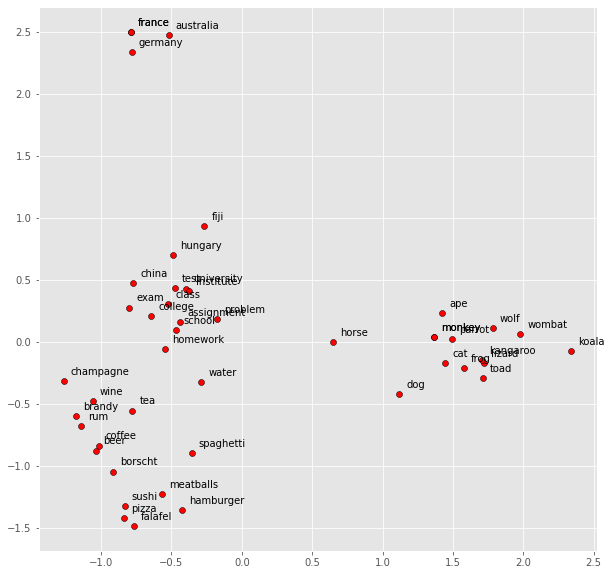

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

word_vectors = np.array([w2v_model[w] for w in words])

twodim = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(10,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, twodim):
    plt.text(x+0.05, y+0.05, word)
plt.style.use('ggplot')


Tokens/Words are always lowercased. If a word is not in the vocabulary, the model throws an exception.

SpaCy also has integrated word embeddings

In [ ]:
import spacy
import spacy.cli
spacy.cli.download("en_core_web_md")

nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
banana True 6.700014 False
afskfsd False 0.0 True


Now we have used most of the RAM allowed per session. Try only using one word model per session (they are big!)

# Custom Word2Vec 

Restart the notebook. Runtime -> Factory reset runtime + Reconnect

Get the Game of Thrones text:

In [ ]:
import warnings 
warnings.filterwarnings("ignore") 

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/" + "DL-NLP/Data/"

Mounted at /content/drive


Gensim Word2Vec needs a list of sentences, with each sentence composed as a list of tokens

In [ ]:
got_text = ""
with open(path + "game_of_thrones.txt", "rb") as file:
    for f in file:
      line = f.strip()
      line = line.decode('unicode_escape').encode('ascii','ignore')
      got_text += str(line)

In [ ]:
print(got_text[:5000])

b'A Game Of Thrones'b'Book One of A Song of Ice and Fire'b'By George R. R. Martin'b'PROLOGUE'b'"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are'b'dead."'b'"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile.'b'Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go.'b'"Dead is dead," he said. "We have no business with the dead."'b'"Are they dead?" Royce asked softly. "What proof have we?"'b'"Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me."'b'Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather'b'than sooner. "My mother told me that dead men sing no songs," he put in.'b'"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s'b'tit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit fore

Escape sequences depend on the type of text data you use. HTML use "\<br /\>", binary use "'b'", and most of the text use "\n" or "\r"

In [ ]:
got_text = got_text.replace("'b'", " ").replace("'b\"", " ").replace("\"b'", "")[2:]

In [ ]:
print(got_text[:5000])

A Game Of Thrones Book One of A Song of Ice and Fire By George R. R. Martin PROLOGUE "We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are dead." "Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. "Dead is dead," he said. "We have no business with the dead." "Are they dead?" Royce asked softly. "What proof have we?" "Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me." Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather than sooner. "My mother told me that dead men sing no songs," he put in. "My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s tit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit forest. Page 1  "We have a long ri

In [ ]:
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
got_sentences = nltk.sent_tokenize(got_text)

In [ ]:
got_sentences[:20]

['A Game Of Thrones Book One of A Song of Ice and Fire By George R. R. Martin PROLOGUE "We should start back," Gared urged as the woods began to grow dark around them.',
 '"The wildlings are dead."',
 '"Do the dead frighten you?"',
 'Ser Waymar Royce asked with just the hint of a smile.',
 'Gared did not rise to the bait.',
 'He was an old man, past fifty, and he had seen the lordlings come and go.',
 '"Dead is dead," he said.',
 '"We have no business with the dead."',
 '"Are they dead?"',
 'Royce asked softly.',
 '"What proof have we?"',
 '"Will saw them," Gared said.',
 '"If he says they are dead, that\\\'s proof enough for me."',
 'Will had known they would drag him into the quarrel sooner or later.',
 'He wished it had been later rather than sooner.',
 '"My mother told me that dead men sing no songs," he put in.',
 '"My wet nurse said the same thing, Will," Royce replied.',
 '"Never believe anything you hear at a woman\\\'s tit.',
 'There are things to be learned even from the dead

In [ ]:
re.findall(r'(\w+)', got_sentences[19])

['His', 'voice', 'echoed', 'too', 'loud', 'in', 'the', 'twilit', 'forest']

In [ ]:
got_tokens = [re.findall(r'(\w+)', sentence) for sentence in got_sentences]

In [ ]:
got_tokens[17:19]

[['Never',
  'believe',
  'anything',
  'you',
  'hear',
  'at',
  'a',
  'woman',
  's',
  'tit'],
 ['There',
  'are',
  'things',
  'to',
  'be',
  'learned',
  'even',
  'from',
  'the',
  'dead']]

Until now everything was preprocessing... normally this will take most of the time!

In [ ]:
from gensim.models import Word2Vec
got_model = Word2Vec(got_tokens, size=128, window=3, min_count=5, workers=4) # Default CBOW, otherwise sg=1

In [ ]:
got_model.most_similar('walkers')

[('flecked', 0.8892049789428711),
 ('sentinels', 0.8772892951965332),
 ('grapes', 0.8725183010101318),
 ('indigo', 0.8721906542778015),
 ('jet', 0.8707931041717529),
 ('veined', 0.8689773082733154),
 ('wilderness', 0.8681952953338623),
 ('coal', 0.8676015734672546),
 ('sulfur', 0.8661009073257446),
 ('scale', 0.8647270202636719)]

In [ ]:
got_model.most_similar(positive=["Ned", "Jaime"], negative=["Catelyn"])[0][0]

'Cersei'

In [ ]:
characters= ["Joffrey", "Ned", "Baratheon", "Jaime", "Catelyn", "Stark", "Cersei", "Lannister", "Jorah",
              "Jon", "Snow", "Robb", "Sansa", "Arya", "Theon", "Bran", "Clegane", "Tyrion", "Littlefinger",
              "Davos", "Samwell", "Stannis", "Melisandre", "Bronn", "Shae", "Margaery", "Tywin", "Daenerys", 
              "Ramsay", "Brienne", "Ygritte", "Tormund", "Bolton", "Worm"]

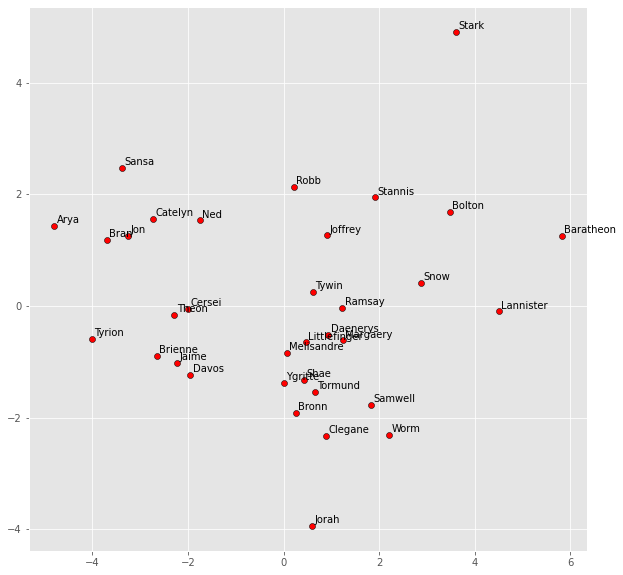

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

word_vectors = np.array([got_model[w] for w in characters])

twodim = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(10,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, twodim):
    plt.text(x+0.05, y+0.05, word)
plt.style.use('ggplot')

# Custom FastText

FastText needs as input raw processed texts, no lists

In [ ]:
!pip install fasttext
import fasttext

     |████████████████████████████████| 71kB 1.7MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3018197 sha256=c6072010a1f3c1221d375a9a1f309a9065564cdbf00fd5621db9aac74e423b87
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
got_tokens_flat = [token for sentence in got_tokens for token in sentence]
with open("game_of_thrones_clean.txt", "w") as file:
  file.write(" ".join(got_tokens_flat))

In [ ]:
model = fasttext.train_unsupervised("game_of_thrones_clean.txt")

In [ ]:
model.get_nearest_neighbors('walkers')

[(0.8015481233596802, 'walks'),
 (0.7136003375053406, 'newcomers'),
 (0.7101641297340393, 'Strangers'),
 (0.7083956003189087, 'strangers'),
 (0.7071851491928101, 'walking'),
 (0.7011120915412903, 'walked'),
 (0.6838564872741699, 'partners'),
 (0.6805073618888855, 'ledgers'),
 (0.6767196655273438, 'dangers'),
 (0.6716370582580566, 'walk')]

In [ ]:
model.get_analogies("Ned", "Catelyn", "Jaime")

[(0.6068811416625977, 'king'),
 (0.5810509324073792, 'Praed'),
 (0.563240647315979, 'fooled'),
 (0.5576578974723816, 'Served'),
 (0.5505227446556091, 'he'),
 (0.5494360327720642, 'Esgred'),
 (0.5489625930786133, 'Hasty'),
 (0.543505072593689, 'Need'),
 (0.5407057404518127, 'theft'),
 (0.5380010604858398, 'penned')]

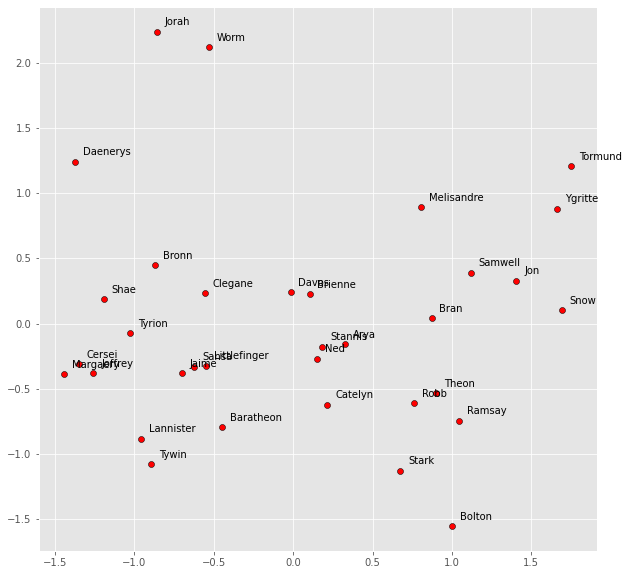

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

word_vectors = np.array([model[w] for w in characters])

twodim = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(10,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, twodim):
    plt.text(x+0.05, y+0.05, word)
plt.style.use('ggplot')

# Word Embeddings for text classification

In [ ]:
import tensorflow as tf

You have three options for using word embeddings to solve NLP tasks:


1.   Use pre-trained embeddings
2.   Fine-tune pre-trained embeddings 
3.   Learn embeddings from scratch according to the task

Programming skipgram from scratch belongs to option 1! (not 3) The pre-trained embedding you train will hardly be as good as state-of-the-art embeddings

Let's try the three options and classify the IMDb Dataset with positive and negative reviews.



## 1) Use Pre-trained embeddings

### Load the Data

Throughout the course we will learn how to input text into TensorFlow. This always is a headache... For this first example, we will use a common dataset, the simplest method. It loads a keras **dataset** . 

In [ ]:
import tensorflow_datasets as tfds

train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS9WJF8/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS9WJF8/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS9WJF8/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for item in train_data.take(5):
  print(item)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(5))) # Python iterators and generators

We will use the embeddings that exist in the [Tensorflow hub repository](https://tfhub.dev/s?module-type=text-embedding) Next week, we will learn how to use embeddings outside from this hub

In [ ]:
import tensorflow_hub as hub

embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=False)
hub_layer(train_examples_batch[:1]) # Don't use train_examples_batch[0], or any index, as it will not have a shape

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456]],
      dtype=float32)>

### Run the Model

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_9 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_8 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 833
Non-trainable params: 48,190,600
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data.batch(512),
                    epochs=5,
                    validation_data=validation_data.batch(512))

Epoch 1/5
30/30 [==============================] - 3s 91ms/step - loss: 0.6941 - accuracy: 0.5174 - val_loss: 0.6749 - val_accuracy: 0.5928
Epoch 2/5
30/30 [==============================] - 3s 86ms/step - loss: 0.6628 - accuracy: 0.6311 - val_loss: 0.6492 - val_accuracy: 0.6554
Epoch 3/5
30/30 [==============================] - 3s 90ms/step - loss: 0.6380 - accuracy: 0.6693 - val_loss: 0.6239 - val_accuracy: 0.6833
Epoch 4/5
30/30 [==============================] - 3s 90ms/step - loss: 0.6119 - accuracy: 0.6926 - val_loss: 0.5995 - val_accuracy: 0.7015
Epoch 5/5
30/30 [==============================] - 3s 90ms/step - loss: 0.5914 - accuracy: 0.7064 - val_loss: 0.5818 - val_accuracy: 0.7130


In [ ]:
model.evaluate(test_data.batch(512))

49/49 [==============================] - 2s 50ms/step - loss: 0.5876 - accuracy: 0.7047


[0.5876357555389404, 0.7046800255775452]

## 2) Fine-tune pre-trained embeddings

In [ ]:
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])
history = model.fit(train_data.batch(512),
                    epochs=5,
                    validation_data=validation_data.batch(512))

Epoch 1/5
30/30 [==============================] - 18s 586ms/step - loss: 0.5188 - accuracy: 0.8319 - val_loss: 0.4570 - val_accuracy: 0.8386
Epoch 2/5
30/30 [==============================] - 16s 545ms/step - loss: 0.3304 - accuracy: 0.9186 - val_loss: 0.3675 - val_accuracy: 0.8555
Epoch 3/5
30/30 [==============================] - 16s 546ms/step - loss: 0.2395 - accuracy: 0.9349 - val_loss: 0.3293 - val_accuracy: 0.8648
Epoch 4/5
30/30 [==============================] - 16s 544ms/step - loss: 0.1875 - accuracy: 0.9483 - val_loss: 0.3125 - val_accuracy: 0.8699
Epoch 5/5
30/30 [==============================] - 16s 544ms/step - loss: 0.1513 - accuracy: 0.9587 - val_loss: 0.3051 - val_accuracy: 0.8727


In [ ]:
model.evaluate(test_data.batch(512))

49/49 [==============================] - 2s 46ms/step - loss: 0.3213 - accuracy: 0.8614


[0.3213419020175934, 0.8613600134849548]

In the future, we will learn about word embeddings from advanced language models such as BERT. Hang on tight!

## 3) Learn embeddings from scratch (Task dependent embeddings)

Instead of the hub layer, we need 3 new layers:

*   [**TextVectorization**](https://towardsdatascience.com/you-should-try-the-new-tensorflows-textvectorization-layer-a80b3c6b00ee)  Standardize (clean the text), tokenize, and vectorize the data (transform from string to integer). You can define your custom standardization, tokenization and vocabulary (use tf operations only).
*   **Embedding** like a lookup table that maps from integer indices (which stand for specific words) to dense vectors (their embeddings). Combination of one-hot encoding layer and a dense layer (from word2vec model), however its optimized
*  **GlobalAveragePooling1D** to average word embeddings into a document embedding

It is important to preprocess the data identically at train and test time. That is why its recommended to use the TextVectorization layer. However, you can skip it if you do the pre-processing manually




In [ ]:
import re 
import string

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')

Last sentence replaces all punctuations from string, see [here](https://stackoverflow.com/questions/12437667/how-do-i-replace-punctuation-in-a-string-in-python/12437738)

In [ ]:
example = train_examples_batch[:1]
print(example)
print(example.numpy())

<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."],
      dtype=object)>

In [ ]:
custom_standardization(example)

<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'this was an absolutely terrible movie dont be lured in by christopher walken or michael ironside both are great actors but this must simply be their worst role in history even their great acting could not redeem this movies ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the columbian rebels were making their cases for revolutions maria conchita alonso appeared phony and her pseudolove affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actors like christopher walkens good name i could barely sit through it'],
      dtype=object)>

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_sentence_size = 100
vocabulary_size = 10000
vectorize_layer = TextVectorization(
    standardize=custom_standardization, # "lower_and_strip_punctuation" is the default, you can also use None
    max_tokens=vocabulary_size,
    output_sequence_length=max_sentence_size)

The output will have each sentence padded or truncated to exactly *output_sequence_length* values

Preprocessing layers in Keras need to be adapted with the training text.

To modify **datasets** you use *map* or *filter*

In [ ]:
train_text = train_data.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
vectorize_layer(example)

<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[  11,   13,   33,  430,  369,   17,   89,   26, 9032,    8,   32,
        1282, 3873,   40,  518,    1,  194,   24,   83,  152,   18,   11,
         216,  317,   26,   66,  239,  215,    8,  479,   54,   66,   83,
         112,   97,   21, 6037,   11,   92,  663,  738,   11,   17,    7,
          33,  401, 9003,  170, 2412,  409,    2,   88, 1137,  134,   67,
         143,   52,    2,    1, 7546,   67,  246,   66, 2938,   15,    1,
        2633,    1,    1, 1436, 4420,    3,   39,    1, 1655,   16, 3873,
          13,  156,   18,    4, 1137,  877, 7553,    8,    4,   17,   12,
          13, 3849,    5,   99,  147, 1157,   10,  228,  655,   12,   47,
          24]])>

In [ ]:
embedding_dimension = 50
embedding_layer = tf.keras.layers.Embedding(vocabulary_size, embedding_dimension)

In [ ]:
embedding_layer(vectorize_layer(example))

<tf.Tensor: shape=(1, 100, 50), dtype=float32, numpy=
array([[[ 0.04290206, -0.02266848, -0.04666638, ..., -0.04660019,
          0.00709547, -0.04285001],
        [ 0.03949076,  0.00380892,  0.033928  , ...,  0.01207324,
          0.00075465, -0.04998704],
        [ 0.01950406, -0.02392198, -0.04337719, ..., -0.011907  ,
          0.03349645, -0.0172596 ],
        ...,
        [-0.02676337, -0.00492618,  0.01122578, ..., -0.03723867,
          0.03837427,  0.01638185],
        [-0.03070238,  0.03562284,  0.01142385, ...,  0.01361148,
         -0.02994455,  0.02913057],
        [-0.00537091,  0.04744369,  0.01596158, ..., -0.00741767,
          0.0206777 ,  0.03621099]]], dtype=float32)>

In [ ]:
average_layer = tf.keras.layers.GlobalAveragePooling1D()

In [ ]:
average_layer(embedding_layer(vectorize_layer(example)))

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[-0.00134246,  0.00035596,  0.00100445, -0.00147516, -0.00453329,
         0.00105128, -0.00566701, -0.00314678,  0.00024413, -0.00777614,
         0.00248353,  0.0018221 , -0.00397532,  0.00163716, -0.00458829,
         0.00122274, -0.00066504, -0.00098694, -0.00171424, -0.00066761,
         0.00728711,  0.004703  ,  0.00668811,  0.00516293, -0.00743236,
        -0.00342748,  0.00748408,  0.00176067, -0.00567498,  0.00243589,
        -0.00027103,  0.00073143,  0.00120327,  0.00197111,  0.00497473,
         0.00648872, -0.00254615, -0.00262079,  0.00181239,  0.00455283,
        -0.00412883, -0.00103881,  0.00242932, -0.00011826,  0.00270188,
        -0.00442809, -0.000859  ,  0.00062898,  0.00190157, -0.00607843]],
      dtype=float32)>

In [ ]:
model = tf.keras.models.Sequential()
model.add(vectorize_layer)
model.add(embedding_layer)
model.add(average_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])
history = model.fit(train_data.batch(512),
                    epochs=5,
                    validation_data=validation_data.batch(512))

Epoch 1/5
30/30 [==============================] - 3s 112ms/step - loss: 0.6905 - accuracy: 0.5881 - val_loss: 0.6859 - val_accuracy: 0.6566
Epoch 2/5
30/30 [==============================] - 3s 111ms/step - loss: 0.6778 - accuracy: 0.6865 - val_loss: 0.6675 - val_accuracy: 0.6992
Epoch 3/5
30/30 [==============================] - 3s 109ms/step - loss: 0.6486 - accuracy: 0.7319 - val_loss: 0.6313 - val_accuracy: 0.7398
Epoch 4/5
30/30 [==============================] - 3s 111ms/step - loss: 0.5982 - accuracy: 0.7771 - val_loss: 0.5792 - val_accuracy: 0.7755
Epoch 5/5
30/30 [==============================] - 3s 115ms/step - loss: 0.5335 - accuracy: 0.8125 - val_loss: 0.5231 - val_accuracy: 0.7964


In [ ]:
model.evaluate(test_data.batch(512))

49/49 [==============================] - 3s 58ms/step - loss: 0.5337 - accuracy: 0.7845


[0.5336787700653076, 0.7844799757003784]

### Extract word embeddings

In [ ]:
vocab = vectorize_layer.get_vocabulary()
print(vocab[:10])

weights = model.get_layer('embedding_1').get_weights()[0]
print(weights.shape)

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it']
(10000, 50)


# Continue Learning

## Skipgram with subwords (quasi FastText) from scratch

Nowadays, word2vec embeddings are suboptimal to advanced embeddings, so training your own word2vec model is mostly for learning purposes. Try to understand the following code. Professor Simon Hegelich explains the code: https://www.youtube.com/watch?v=qvY70T2Dx2I&t=6s&ab_channel=SimonHegelich

In [ ]:
!pip install tf_sentencepiece
!pip install sentencepiece
import sentencepiece as spm
import collections
import numpy as np
import io

vocab_size=10000
sub_size=15000
window_size = 3
vector_dim = 768
epochs = 10000

     |████████████████████████████████| 1.1MB 2.8MB/s 


In [ ]:
!wget https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt
spm.SentencePieceTrainer.train('--model_prefix=m --input=botchan.txt --vocab_size=5000')

--2020-10-20 15:27:18--  https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278779 (272K) [text/plain]
Saving to: ‘botchan.txt.3’

botchan.txt.3       100%[===================>] 272.25K  --.-KB/s    in 0.05s   

2020-10-20 15:27:18 (5.14 MB/s) - ‘botchan.txt.3’ saved [278779/278779]



In [ ]:
sp = spm.SentencePieceProcessor()
sp.load('m.model')

print(sp.encode_as_pieces('No translation can expect to equal, much less to excel, the original.'))

['▁No', '▁translation', '▁can', '▁expect', '▁to', '▁equal', ',', '▁much', '▁less', '▁to', '▁excel', ',', '▁the', '▁original', '.']


In [ ]:
with open("botchan.txt", "r", encoding = "utf8") as f: text = f.read()
vocabulary = sp.encode_as_pieces(text)

In [ ]:
def build_dataset(words, n_words):
    """Process raw inputs into a dataset."""
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(n_words - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, reversed_dictionary
    
data, count, dictionary, reverse_dictionary = build_dataset(vocabulary, vocab_size)

In [ ]:
sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(vocab_size)
couples, labels = tf.keras.preprocessing.sequence.skipgrams(data, vocab_size, window_size=window_size, sampling_table=sampling_table)
word_target, word_context = zip(*couples)
word_target = np.array(word_target, dtype="int32")
word_context = np.array(word_context, dtype="int32")

print(couples[:10], labels[:10])

[[4621, 3], [607, 82], [2347, 7192], [4013, 50], [507, 2647], [3740, 1725], [3028, 8372], [3437, 531], [2375, 4136], [108, 9893]] [1, 1, 0, 1, 0, 1, 0, 0, 1, 0]


In [ ]:
# create some input variables
input_target = tf.keras.Input((1,))
input_context = tf.keras.Input((1,))

embedding = tf.keras.layers.Embedding(vocab_size, vector_dim, input_length=1, name='embedding')

target = embedding(input_target)
target = tf.keras.layers.Reshape((vector_dim, 1))(target)
context = embedding(input_context)
context = tf.keras.layers.Reshape((vector_dim, 1))(context)

# setup a cosine similarity operation which will be output in a secondary model
similarity = tf.keras.layers.dot(inputs=[target, context], axes=1, normalize=True)

# now perform the dot product operation to get a similarity measure
dot_product = tf.keras.layers.dot(inputs=[target, context], axes=1)
dot_product = tf.keras.layers.Reshape((1,))(dot_product)
# add the sigmoid output layer
output = tf.keras.layers.Dense(1, activation='sigmoid')(dot_product)

# create the primary training model
model = tf.keras.Model(inputs=[input_target, input_context], outputs=output)
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 768)       7680000     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 768, 1)       0           embedding[0][0]       

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [ ]:
validation_model = tf.keras.Model(inputs=[input_target, input_context], outputs=similarity)
valid_size = 8     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

In [ ]:
arr_1 = np.zeros((1,))
arr_2 = np.zeros((1,))
arr_3 = np.zeros((1,))
for cnt in range(epochs):
    idx = np.random.randint(0, len(labels)-1)
    arr_1[0,] = word_target[idx]
    arr_2[0,] = word_context[idx]
    arr_3[0,] = labels[idx]
    loss = model.train_on_batch([arr_1, arr_2], arr_3)
    if cnt % 100 == 0:
        print("Iteration {}, loss={}".format(cnt, loss))

Iteration 0, loss=0.7053478956222534
Iteration 100, loss=0.6963716149330139
Iteration 200, loss=0.6849884986877441
Iteration 300, loss=0.6885661482810974
Iteration 400, loss=0.7031601071357727
Iteration 500, loss=0.7041258215904236
Iteration 600, loss=0.6664434671401978
Iteration 700, loss=0.662391185760498
Iteration 800, loss=0.7152111530303955
Iteration 900, loss=0.6654011011123657
Iteration 1000, loss=0.6620818376541138
Iteration 1100, loss=0.7174370884895325
Iteration 1200, loss=0.7224536538124084
Iteration 1300, loss=0.7118344902992249
Iteration 1400, loss=0.6750195622444153
Iteration 1500, loss=0.6724262237548828
Iteration 1600, loss=0.6764041781425476
Iteration 1700, loss=0.6627891659736633
Iteration 1800, loss=0.7275967597961426
Iteration 1900, loss=0.7140529155731201
Iteration 2000, loss=0.7121535539627075
Iteration 2100, loss=0.6860037446022034
Iteration 2200, loss=0.6834640502929688
Iteration 2300, loss=0.6909427046775818
Iteration 2400, loss=0.689208447933197
Iteration 2500

Training a word2vec model needs way more epochs and a couple of days to run...